ope you like it and give Upvote It# İş Hedefi

Bir finans kuruluşu, krediyi ödemede temerrüde düşme olasılığı daha düşük olan müşterileri belirlemelerine yardımcı olmamızı istiyor.

Şirket yönetimi, veri bilimi ekibinden kimin iyi bir müşteri olabileceğini belirlemek için bir tahmin modeli oluşturmasını istedi. Dahası, ekibin, kredi başvurusunda bulunduklarında, modele dayanarak müşteriye sorulacak soruları bulmasını istiyorlar.

## İmport paketlerini yüklüyorum

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA - Exploratory data analysis

In [2]:
df=pd.read_csv('LoansTrainingSet.csv')


In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.shape

(256984, 19)

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [6]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

# Feature Engineering

In [7]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                              Missing Values  Percentage
Loan ID                                    0    0.000000
Customer ID                                0    0.000000
Loan Status                                0    0.000000
Current Loan Amount                        0    0.000000
Term                                       0    0.000000
Credit Score                           61676   23.999938
Years in current job                   11476    4.465648
Home Ownership                             0    0.000000
Annual Income                          61676   23.999938
Purpose                                    0    0.000000
Monthly Debt                               0    0.000000
Years of Credit History                    0    0.000000
Months since last delinquent          140383   54.627136
Number of Open Accounts                    0    0.000000
Number of Credit Problems                  0    0.000000
Current Credit Balance                     0    0.000000
Maximum Open Credit            

In [8]:
df['Credit Score'].value_counts()

Credit Score
747.0     5669
740.0     5537
741.0     5499
746.0     5486
742.0     5219
          ... 
5980.0       3
6070.0       3
5910.0       3
5930.0       2
5860.0       1
Name: count, Length: 334, dtype: int64

In [9]:
df['Credit Score'] = df['Credit Score'].apply(lambda val: (val / 10) if val > 850 else val)

In [10]:
df['Credit Score'].min(), df['Credit Score'].max(), df['Credit Score'].mean(), df['Credit Score'].median()

(585.0, 751.0, 721.203197001659, 730.0)

In [11]:
# Boş değerleri mean ile dolduruyorum
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mean())
df['Annual Income'].min(), df['Annual Income'].max(), df['Annual Income'].mean(), df['Annual Income'].median()

(0.0, 8713547.0, 71952.71618674094, 61242.0)

In [12]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].mean())

In [13]:
df['Years in current job'].value_counts()

Years in current job
10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
9 years       9932
Name: count, dtype: int64

In [14]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].mode()[0])

In [15]:
# Son gecikmeden bu yana geçen ayları kaldırıyorum
df = df.drop('Months since last delinquent', axis=1)

In [16]:
df['Bankruptcies'].value_counts(), df['Bankruptcies'].mean(), df['Bankruptcies'].median(), df['Bankruptcies'].mode()
#iflaslara bakıyorum

(Bankruptcies
 0.0    229661
 1.0     25605
 2.0       957
 3.0       180
 4.0        33
 5.0        15
 6.0         3
 7.0         1
 Name: count, dtype: int64,
 0.11031564991908911,
 0.0,
 0    0.0
 Name: Bankruptcies, dtype: float64)

In [17]:
#iflasları doldurmam gerekiyor
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])

In [18]:
df['Tax Liens'].value_counts(), df['Tax Liens'].mean(), df['Tax Liens'].median(), df['Tax Liens'].mode()

(Tax Liens
 0.0     252322
 1.0       3276
 2.0        872
 3.0        247
 4.0        124
 5.0         61
 6.0         30
 9.0         10
 8.0          8
 7.0          6
 10.0         3
 11.0         2
 Name: count, dtype: int64,
 0.027202571596467946,
 0.0,
 0    0.0
 Name: Tax Liens, dtype: float64)

In [19]:
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].mode()[0])

In [20]:
##Nul değerler
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [21]:
#Loan ve customer çıkar
df.drop('Loan ID', axis=1, inplace=True)
df.drop('Customer ID', axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                256984 non-null  object 
 1   Current Loan Amount        256984 non-null  int64  
 2   Term                       256984 non-null  object 
 3   Credit Score               256984 non-null  float64
 4   Years in current job       256984 non-null  object 
 5   Home Ownership             256984 non-null  object 
 6   Annual Income              256984 non-null  float64
 7   Purpose                    256984 non-null  object 
 8   Monthly Debt               256984 non-null  object 
 9   Years of Credit History    256984 non-null  float64
 10  Number of Open Accounts    256984 non-null  int64  
 11  Number of Credit Problems  256984 non-null  int64  
 12  Current Credit Balance     256984 non-null  int64  
 13  Maximum Open Credit        25

In [23]:
#dummy ile categorileri yay
#df = pd.get_dummies(df, drop_first=True, columns=['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt'])

In [24]:
df.shape

(256984, 16)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                256984 non-null  object 
 1   Current Loan Amount        256984 non-null  int64  
 2   Term                       256984 non-null  object 
 3   Credit Score               256984 non-null  float64
 4   Years in current job       256984 non-null  object 
 5   Home Ownership             256984 non-null  object 
 6   Annual Income              256984 non-null  float64
 7   Purpose                    256984 non-null  object 
 8   Monthly Debt               256984 non-null  object 
 9   Years of Credit History    256984 non-null  float64
 10  Number of Open Accounts    256984 non-null  int64  
 11  Number of Credit Problems  256984 non-null  int64  
 12  Current Credit Balance     256984 non-null  int64  
 13  Maximum Open Credit        25

In [26]:
df['Maximum Open Credit'].value_counts()

Maximum Open Credit
0        1597
0         234
11345      19
14770      19
10180      19
         ... 
27438       1
56185       1
35435       1
64875       1
55191       1
Name: count, Length: 87188, dtype: int64

In [27]:

df.shape

(256984, 16)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                256984 non-null  object 
 1   Current Loan Amount        256984 non-null  int64  
 2   Term                       256984 non-null  object 
 3   Credit Score               256984 non-null  float64
 4   Years in current job       256984 non-null  object 
 5   Home Ownership             256984 non-null  object 
 6   Annual Income              256984 non-null  float64
 7   Purpose                    256984 non-null  object 
 8   Monthly Debt               256984 non-null  object 
 9   Years of Credit History    256984 non-null  float64
 10  Number of Open Accounts    256984 non-null  int64  
 11  Number of Credit Problems  256984 non-null  int64  
 12  Current Credit Balance     256984 non-null  int64  
 13  Maximum Open Credit        25

In [31]:
df.shape

(256984, 16)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                256984 non-null  object 
 1   Current Loan Amount        256984 non-null  int64  
 2   Term                       256984 non-null  object 
 3   Credit Score               256984 non-null  float64
 4   Years in current job       256984 non-null  object 
 5   Home Ownership             256984 non-null  object 
 6   Annual Income              256984 non-null  float64
 7   Purpose                    256984 non-null  object 
 8   Monthly Debt               256984 non-null  object 
 9   Years of Credit History    256984 non-null  float64
 10  Number of Open Accounts    256984 non-null  int64  
 11  Number of Credit Problems  256984 non-null  int64  
 12  Current Credit Balance     256984 non-null  int64  
 13  Maximum Open Credit        25

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label = LabelEncoder()
df['Loan Status'] = label.fit_transform(df['Loan Status'])
df['Term'] = label.fit_transform(df['Term'])
df['Years in current job'] = label.fit_transform(df['Years in current job'])
df['Home Ownership'] = label.fit_transform(df['Home Ownership'])
df['Purpose'] = label.fit_transform(df['Purpose'])
df['Monthly Debt'] = label.fit_transform(df['Monthly Debt'])
# df['Maximum Open Credit'] = label.fit_transform(df['Maximum Open Credit'])
df_orf = df
df.drop('Maximum Open Credit', axis=1, inplace=True)

# Split the data into training and testing

In [38]:
x = df.drop(['Loan Status'], axis=1)
y = df['Loan Status']

In [39]:
import algo_test

In [40]:
algo_test.model_fit_pred(x,y)

GaussianNB()
Accuracy: 0.4508405105323233
Confusion Matrix:
 [[24304    18]
 [42320 10454]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53     24322
           1       1.00      0.20      0.33     52774

    accuracy                           0.45     77096
   macro avg       0.68      0.60      0.43     77096
weighted avg       0.80      0.45      0.39     77096

----------------------------------------
BernoulliNB()
Accuracy: 0.685223617308291
Confusion Matrix:
 [[  397 23925]
 [  343 52431]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.02      0.03     24322
           1       0.69      0.99      0.81     52774

    accuracy                           0.69     77096
   macro avg       0.61      0.50      0.42     77096
weighted avg       0.64      0.69      0.57     77096

----------------------------------------
LogisticRegression()
Accuracy: 0

RandomForestClassifier()

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 


In [44]:
y_pred = model.predict(x_test)
print(f"Random Forest Classifier Model")
print("Y Predictions: ", y_pred)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Random Forest Classifier Model
Y Predictions:  [1 0 1 ... 1 0 1]
Accuracy Score: 0.8301068155728933
Confusion Matrix: [[10407  5754]
 [ 2978 32258]]
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.64      0.70     16161
           1       0.85      0.92      0.88     35236

    accuracy                           0.83     51397
   macro avg       0.81      0.78      0.79     51397
weighted avg       0.83      0.83      0.83     51397



In [46]:
from sklearn.impute import SimpleImputer
importance = model.feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Features': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Features,Importance
0,Current Loan Amount,0.201071
7,Monthly Debt,0.127159
11,Current Credit Balance,0.127056
8,Years of Credit History,0.116940
2,Credit Score,0.108565
5,Annual Income,0.100297
9,Number of Open Accounts,0.078156
3,Years in current job,0.056009
6,Purpose,0.025187
1,Term,0.024115


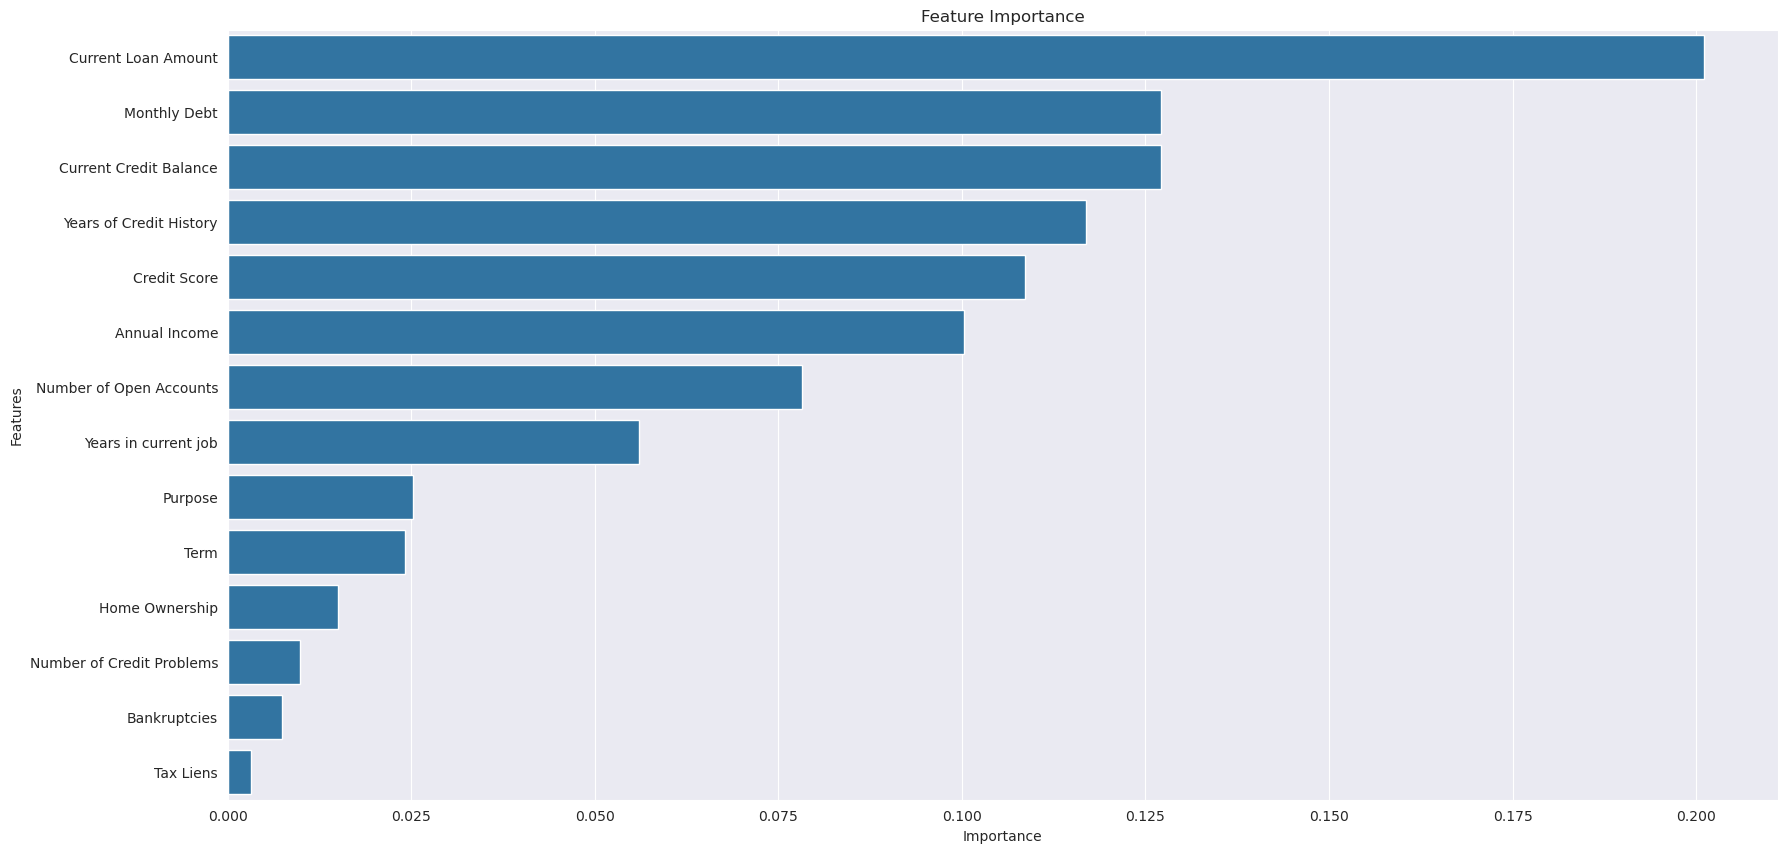

In [47]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Importance', y='Features', data=importance_df)
plt.title('Feature Importance')
plt.show()

Text(0, 0.5, 'Density')

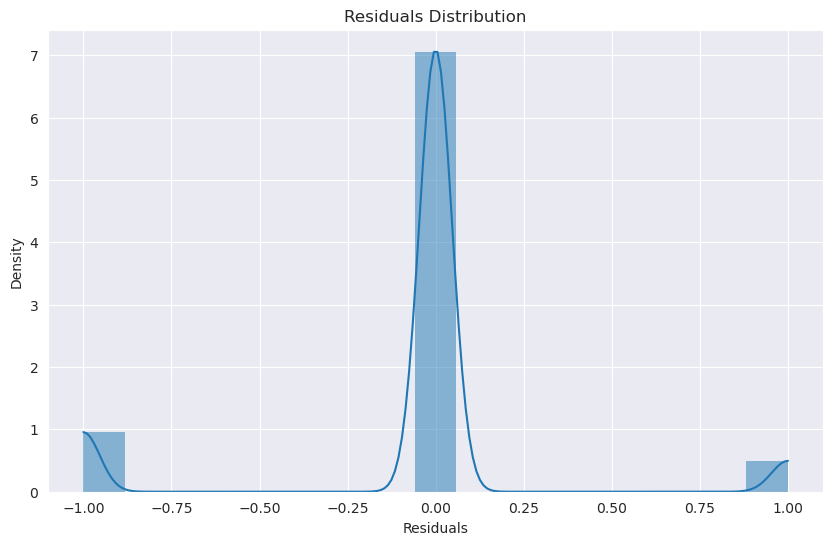

In [48]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, stat="density", linewidth=0)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')

In [49]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


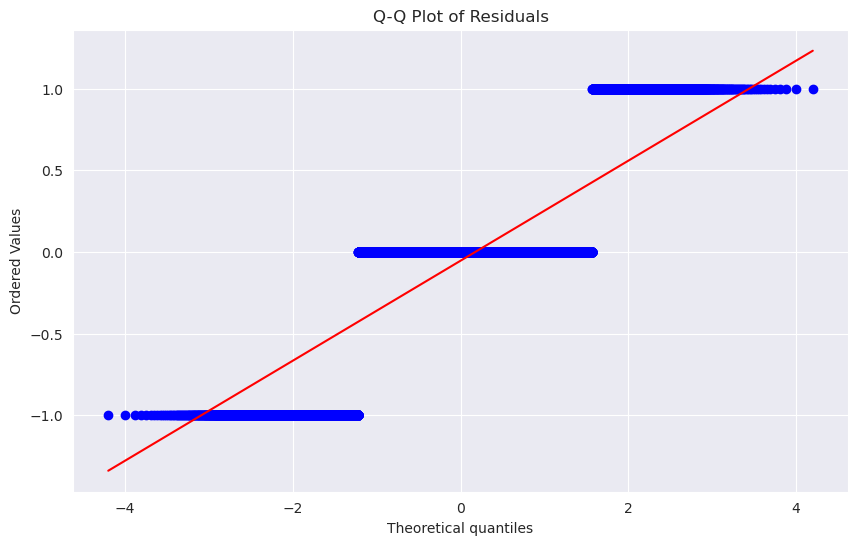

In [50]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
# Kredi çekecek kişiye kredi puanını, yıllık geliri ve müşterinin ödemedem sorun yaşatmayacağı sorlulabirlir.